In [1]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import cartopy.crs as ccrs
import geopandas as gpd
from shapely.geometry import Point
from geopy.distance import great_circle
import cartopy.feature as cfeature

print("Imported :)")

Imported :)


In [2]:
#process all drifters that have run aground
print("Starting...")

print("Processing file: runUnD")
beach_undrogued = pd.read_csv('dat1/Drifters/drifter data/global drifter program/csv files/GDP_RunAground_undrouged.csv')

print("Done processing :)")

Starting...
Processing file: runUnD
Done processing :)


In [3]:
print("Sorting data ends...")

#sort runUnD end
#beach_undrogued_sort = beach_undrogued[['ID', 'lat', 'lon', 've', 'vn', 'time']].values.tolist()
beach_undrogued_reverse = beach_undrogued.sort_values(by=['ID', 'time'], ascending=[True, False])
beach_undrogued_end = beach_undrogued_reverse.drop_duplicates(subset='ID', keep='first')
beach_undrogued_end.reset_index(drop=True, inplace=True)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
print("Finished :)")

Sorting data ends...
Finished :)


In [4]:
#extract ID, lat, lon, time from the files
print("starting!")

beach_undrogued_end_extract = beach_undrogued_end[['ID', 'lat', 'lon', 've', 'vn', 'time']].values.tolist()

print("ended")

#take end time - begin time to get total time travelled
#save id and time together
#plot saved ids

starting!
ended


Creating map...


KeyboardInterrupt: 

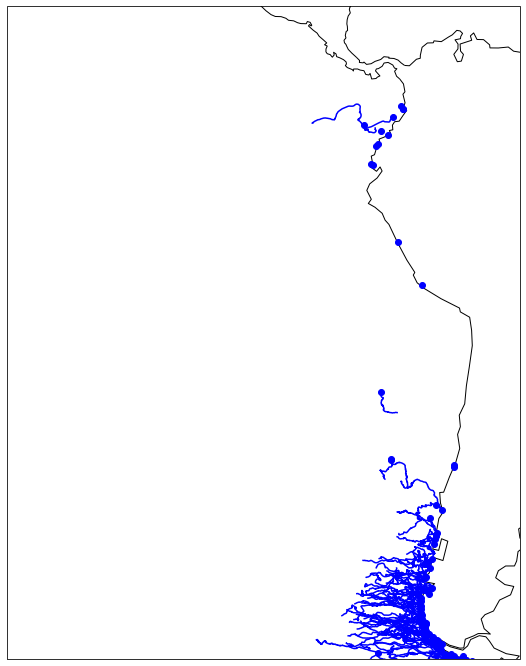

In [5]:
#create map
# 120, 150, 20, 45 jap
print("Creating map...")

fig = plt.figure(figsize=(22, 12))
ax = plt.axes(projection=ccrs.PlateCarree())
#left right bottom top
ax.set_extent([-120, -65, -55, 15], crs=ccrs.PlateCarree())
ax.coastlines()
point_size = 10
for IDs in pd.unique(beach_undrogued['ID']):
    ind=beach_undrogued['ID']==IDs;
    traj_id=beach_undrogued[ind]
    latest_time=max(traj_id.time)
    ind_time=(traj_id['time']>latest_time-60*60*24*30)
    max_t=max(traj_id[ind_time]['time'])
    last_lat=traj_id[ traj_id['time']==max_t ].lat
    last_lon=traj_id[ traj_id['time']==max_t ].lon
    min_lat, max_lat = -60, 5
    min_lon, max_lon = -83, -68
    if min_lat <= np.array(last_lat) <= max_lat and min_lon <= np.array(last_lon) <= max_lon:
        plt.plot(traj_id[ind_time].lon,traj_id[ind_time].lat,'b-')
        plt.plot(last_lon,last_lat,'bo')



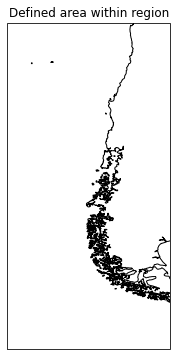

In [22]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Define the latitude and longitude ranges
min_lat, max_lat = -60, -30
min_lon, max_lon = -83, -68

# Create a figure and axis with Plate Carree projection
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Set the extent of the map using the specified latitude and longitude ranges
ax.set_extent([min_lon, max_lon, min_lat, max_lat], crs=ccrs.PlateCarree())

# Add coastlines for context
ax.coastlines()

# Show the plot
plt.title('Defined area within region')
plt.show()


In [23]:
# Define the latitude and longitude range
min_lat, max_lat = -60, -30
min_lon, max_lon = -83, -68


# Initialize the set to store IDs within the region
points_within_region = set()

# Define the time threshold (in seconds) - for the last 6 months
#six_months = 6 * 30 * 24 * 60 * 60  # 6 months in seconds

# Iterate through each entry in 'beach_drogued_end_extract'
for entry in beach_undrogued_end_extract:
    ID, lat, lon, _, _, time = entry
    
# Filter data for the last 30 days
    #ind_time = (traj_id['time'] > latest_time - 60 * 60 * 24 * 30)

    # Find the maximum time within the last 30 days
    #max_t = max(traj_id[ind_time]['time'])

    
    # Check if the ID is in the expected range
    if 9999 <= ID <= 999999:
        # Check if the latitude and longitude are within the specified range
        if min_lat <= np.array(lat) <= max_lat and min_lon <= np.array(lon) <= max_lon:
            # Check if the time is within the last 6 months
            #if time >= (current_time - six_months):
                # Add the ID to the set 'points_within_region'
            points_within_region.add(ID)

print(points_within_region)


{54276.0, 25615.0, 83487.0, 116268.0, 55342.0, 57904.0, 83509.0, 127032.0, 127033.0, 23152.0, 62581.0, 62593.0, 62597.0, 53410.0, 84147.0, 139962.0, 89794.0, 89797.0, 116424.0, 89801.0, 116426.0, 116429.0, 116430.0, 116431.0, 70867.0, 70880.0, 70882.0, 114918.0, 52967.0, 116456.0, 70896.0, 30457.0, 114942.0, 63743.0, 63746.0, 114947.0, 129284.0, 44293.0, 114949.0, 114950.0, 70933.0, 89882.0, 70944.0, 63779.0, 60223.0, 41281.0, 41283.0, 41287.0, 145735.0, 145737.0, 48982.0, 114532.0, 114535.0, 36202.0, 114539.0, 114540.0, 34167.0, 63882.0, 63889.0, 25498.0, 36252.0, 36253.0, 83367.0, 83371.0, 33196.0, 83372.0, 83381.0, 132534.0, 101815.0, 127418.0, 116166.0, 126939.0, 114654.0, 46051.0, 46053.0, 114661.0, 126955.0, 83438.0, 113647.0, 114673.0, 54261.0, 54262.0, 46071.0}


In [24]:
print("start")
latitudes = []
longitudes = []
earliest_points = []  # List to store earliest points
last_points = []  # List to store last points

# Convert the set to a list
points_list = list(points_within_region)

for ID in points_list:
    # Fetch the corresponding trajectory data for the ID
    traj_id = beach_undrogued[beach_undrogued['ID'] == ID]

    if not traj_id.empty:
        # Find the latest time for the ID
        latest_time = max(traj_id['time'])

        # Calculate the start time (6 months ago in Unix timestamp)
        start_time = latest_time - 1555200000000  # 6 months in seconds 15552000

        # Filter data within the last 6 months
        ind_time = (traj_id['time'] >= start_time) & (traj_id['time'] <= latest_time)

        # Filter the data
        latest_data = traj_id[ind_time]

        # Find the earliest time within the last 6 months
        earliest_point = latest_data[latest_data['time'] == min(latest_data['time'])]

        if not earliest_point.empty:
            earliest_points.append(earliest_point[['lat', 'lon']])

        # Find the last time point within the 6 months window
        last_point = latest_data[latest_data['time'] == max(latest_data['time'])]

        if not last_point.empty:
            last_points.append(last_point[['lat', 'lon']])

        # Extract latitudes and longitudes for the latest points
        for index, row in latest_data.iterrows():
            latitudes.append(row['lat'])
            longitudes.append(row['lon'])

print("finish")

start
finish


Creating map...
83


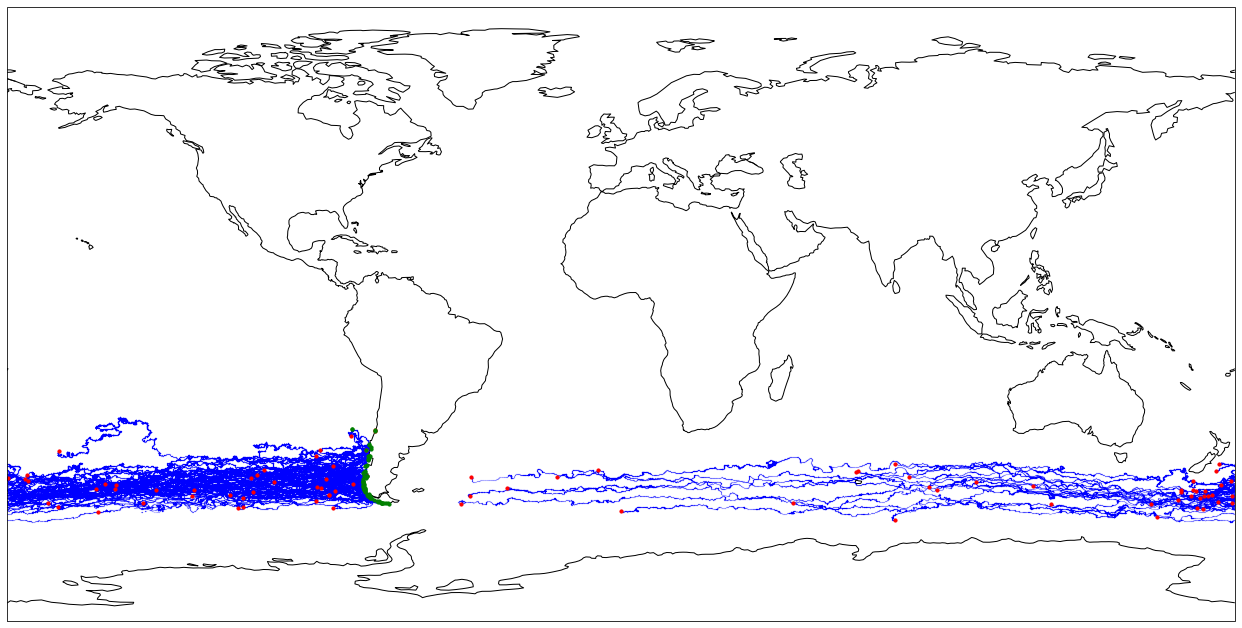

In [26]:
#create map
# 120, 150, 20, 45 jap
print("Creating map...")
fig = plt.figure(figsize=(22, 12))
ax = plt.axes(projection=ccrs.PlateCarree())
#left right bottom top
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
ax.coastlines()
point_size = 10

plt.scatter(longitudes, latitudes, marker='o', color='blue', s=0.0005)

sum=0

# Plot red dots for the earliest points
for point in earliest_points:
    plt.scatter(point['lon'], point['lat'], color='red', s=10, marker='o')
    sum = sum+1

# Plot green dots for the last points
for point in last_points:
    plt.scatter(point['lon'], point['lat'], color='green', s=10, marker='o')
    
print(sum)

In [27]:
#NEW BOX of circumpolar current
#plot every drifter trajectpry that at ANY point passes through the box
#DOES NOT BEACH IN FIRST BOX


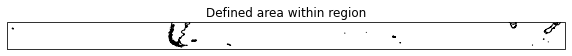

In [28]:
# Define the latitude and longitude ranges
min_lat, max_lat = -57, -40
min_lon, max_lon = -180, 180

# Create a figure and axis with Plate Carree projection
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Set the extent of the map using the specified latitude and longitude ranges
ax.set_extent([min_lon, max_lon, min_lat, max_lat], crs=ccrs.PlateCarree())

# Add coastlines for context
ax.coastlines()

# Show the plot
plt.title('Defined area within region')
plt.show()


In [40]:
# Define the latitude and longitude range
min_lat, max_lat = -57, -40
min_lon, max_lon = -180, 180
print("start")

# Initialize the set to store IDs outside the region
points_without_region = set()

# Iterate through each entry in 'beach_undrogued'
for index, row in beach_undrogued.iterrows():
    ID = row['ID']
    lat = row['lat']
    lon = row['lon']

    # Check if the ID is not in the specified range or if lat/lon is outside the region
    if ID not in points_within_region and not (min_lat <= lat <= max_lat and min_lon <= lon <= max_lon):
        # Add the ID to the set 'points_without_region'
        points_without_region.add(ID)

print("finish")
print(points_without_region)


start
finish
{114689.0, 300234062839810.0, 114696.0, 300234063994890.0, 32783.0, 114704.0, 300234064502800.0, 81937.0, 90129.0, 32790.0, 81942.0, 81945.0, 2875419.0, 81948.0, 114717.0, 81949.0, 81951.0, 300234061611040.0, 300234063945760.0, 81952.0, 81954.0, 300234060890150.0, 300234063945770.0, 81962.0, 81964.0, 106543.0, 106544.0, 106545.0, 106546.0, 300234060890160.0, 300234063945780.0, 81967.0, 81968.0, 81975.0, 106552.0, 90164.0, 81980.0, 81981.0, 300234061611070.0, 81983.0, 81984.0, 90173.0, 81988.0, 81989.0, 81991.0, 90183.0, 90184.0, 300234064871500.0, 114768.0, 114769.0, 300234063945810.0, 82001.0, 90193.0, 82005.0, 114777.0, 300234064732250.0, 114779.0, 114780.0, 90204.0, 82014.0, 90206.0, 114784.0, 300234065485920.0, 114786.0, 300234065846370.0, 114788.0, 90213.0, 300234065338470.0, 114792.0, 300234067001450.0, 82026.0, 114796.0, 41068.0, 114798.0, 114799.0, 82031.0, 114801.0, 114802.0, 2523250.0, 114804.0, 41076.0, 41077.0, 71969.0, 90228.0, 90231.0, 300234065338490.0, 1148

In [ ]:
unique_points_without_region_list = list(points_without_region)
unique_points_without_region = pd.DataFrame({'ID': unique_points_without_region_list})
unique_points_without_region = unique_points_without_region.drop_duplicates(subset='ID', keep='first')

#unique_points_without_region = points_without_region.drop_duplicates(subset='ID', keep='first')
unique_points_without_region

In [36]:
print("start")
WO_latitudes = []
WO_longitudes = []
WO_earliest_points = []  # List to store earliest points
WO_last_points = []  # List to store last points

# Convert the set to a list
WO_points_list = list(points_without_region)

for ID in WO_points_list:
    # Fetch the corresponding trajectory data for the ID
    traj_id = beach_undrogued[beach_undrogued['ID'] == ID]

    if not traj_id.empty:
        # Find the latest time for the ID
        latest_time = max(traj_id['time'])

        # Calculate the start time (6 months ago in Unix timestamp)
        start_time = latest_time - 1555200000000  # 6 months in seconds 15552000

        # Filter data within the last 6 months
        ind_time = (traj_id['time'] >= start_time) & (traj_id['time'] <= latest_time)

        # Filter the data
        latest_data = traj_id[ind_time]

        # Find the earliest time within the last 6 months
        earliest_point = latest_data[latest_data['time'] == min(latest_data['time'])]

        if not earliest_point.empty:
            WO_earliest_points.append(earliest_point[['lat', 'lon']])

        # Find the last time point within the 6 months window
        last_point = latest_data[latest_data['time'] == max(latest_data['time'])]

        if not last_point.empty:
            WO_last_points.append(last_point[['lat', 'lon']])

        # Extract latitudes and longitudes for the latest points
        for index, row in latest_data.iterrows():
            WO_latitudes.append(row['lat'])
            WO_longitudes.append(row['lon'])

print("finish")

start
finish


Creating map...
4169


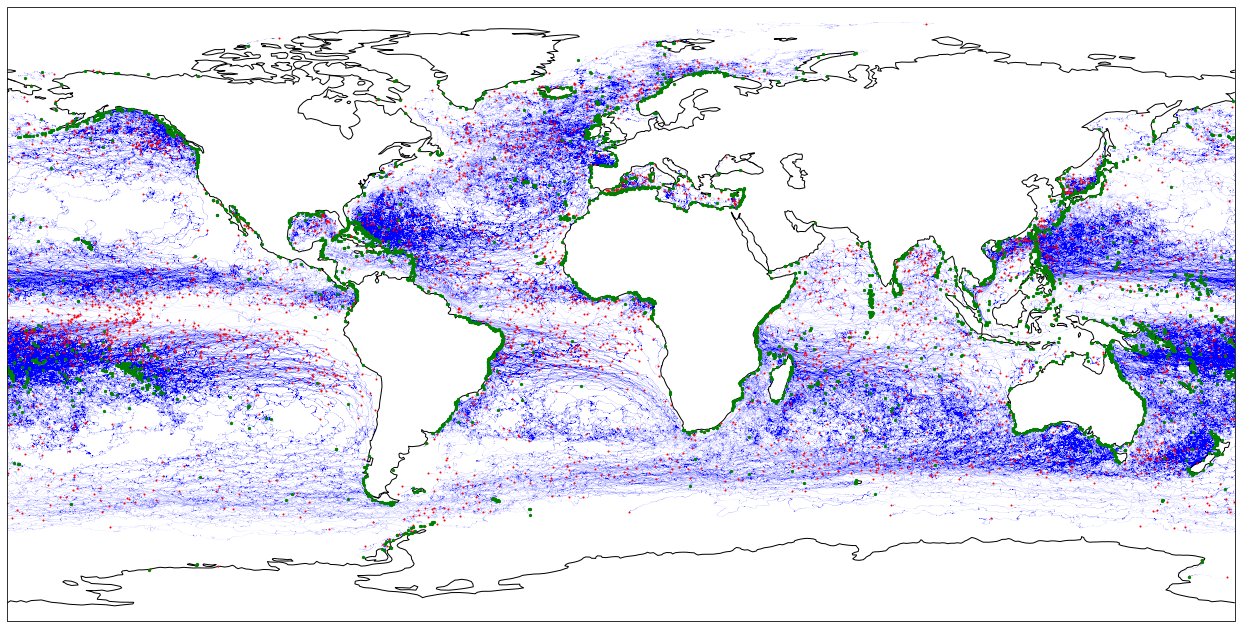

In [39]:
#create map
# 120, 150, 20, 45 jap
print("Creating map...")
fig = plt.figure(figsize=(22, 12))
ax = plt.axes(projection=ccrs.PlateCarree())
#left right bottom top
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
ax.coastlines()
point_size = 10

plt.scatter(WO_longitudes, WO_latitudes, marker='o', color='blue', s=0.000005)

sum=0

# Plot red dots for the earliest points
for point in WO_earliest_points:
    plt.scatter(point['lon'], point['lat'], color='red', s=1, marker='o')
    sum = sum+1

# Plot green dots for the last points
for point in WO_last_points:
    plt.scatter(point['lon'], point['lat'], color='green', s=5, marker='o')
    
print(sum)

In [29]:
# Define the latitude and longitude range
min_lat, max_lat = -57, -40
min_lon, max_lon = -180, -180


# Initialize the set to store IDs within the region
points_without_region = set()

# Define the time threshold (in seconds) - for the last 6 months
#six_months = 6 * 30 * 24 * 60 * 60  # 6 months in seconds

# Iterate through each entry in 'beach_drogued_end_extract'
for ID in beach_undrogued['ID']:
    lon = beach_undrogued['lon']
    lat = beach_undrogued['lat']
    
# Filter data for the last 30 days
    #ind_time = (traj_id['time'] > latest_time - 60 * 60 * 24 * 30)

    # Find the maximum time within the last 30 days
    #max_t = max(traj_id[ind_time]['time'])

    
    # Check if the ID is in the expected range
   # if 9999 <= ID <= 999999:
        # Check if the latitude and longitude are within the specified range
    if ID not in points_within_region:
        if min_lat <= lat <= max_lat and min_lon <= lon <= max_lon:
            # Check if the time is within the last 6 months
            #if time >= (current_time - six_months):
                # Add the ID to the set 'points_within_region'
            points_without_region.add(ID)

print(points_without_region)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [18]:
#for ID in beach_undrogued['ID']:
 #   lon = beach_undrogued['lon']

In [19]:
beach_undrogued['lon']

0           124.716629
1           120.455406
2           120.455193
3           120.456833
4           120.455887
               ...    
23068316   -121.831680
23068317   -121.813133
23068318   -121.795753
23068319   -121.779099
23068320   -121.765068
Name: lon, Length: 23068321, dtype: float64

In [6]:
beach_undrogued

,ID,lat,lon,ve,vn,time
0,101509,13.717500,124.716629,-0.1732,-0.0036,1331078400
1,101510,22.431370,120.455406,-0.0319,0.1226,1328140800
2,101510,22.432320,120.455193,0.0035,-0.0570,1328144400
3,101510,22.430201,120.456833,0.0063,-0.0559,1328148000
4,101510,22.429621,120.455887,-0.0026,-0.0207,1328151600
...,...,...,...,...,...,...
23068316,99237,35.625519,-121.831680,0.4754,-0.4431,1276009200
23068317,99237,35.611141,-121.813133,0.4754,-0.4434,1276012800
23068318,99237,35.596630,-121.795753,0.4548,-0.4522,1276016400
23068319,99237,35.581989,-121.779099,0.4310,-0.4501,1276020000
